<a href="https://colab.research.google.com/github/DIWEERAPURA/Image-Processing-CV-Projects-and-Deep-Learning-Vision-Tasks/blob/main/Rsearch_CMFA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Check for GPU and set up the environment
import torch
if not torch.cuda.is_available():
    print("Warning: No GPU found. Training will be very slow.")
else:
    print(f"GPU found: {torch.cuda.get_device_name(0)}")

# 2. Install necessary libraries
# Dlib can be tricky in Colab, so we install it carefully.
!pip install cmake
!pip install dlib
!pip install opencv-python-headless
!pip install scikit-learn pandas matplotlib
!pip install deap # For the Genetic Algorithm

# 3. Mount your Google Drive to persist data and models
from google.colab import drive
drive.mount('/content/drive')

# 4. Create project directories in your Google Drive
import os
PROJECT_DIR = '/content/drive/MyDrive/FacialAttractivenessProject'
DATA_DIR = os.path.join(PROJECT_DIR, 'datasets')
MODELS_DIR = os.path.join(PROJECT_DIR, 'models')

os.makedirs(PROJECT_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

print("Project setup complete. Directories are ready in your Google Drive.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project setup complete. Directories are ready in your Google Drive.


In [3]:
import os
import zipfile
import random
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# --- 1. Define File Paths ---
# This is our main working directory for datasets.
DATA_DIR = '/content/drive/MyDrive/FacialAttractivenessProject/datasets'
SCUT_ZIP_PATH = os.path.join(DATA_DIR, 'SCUT-FBP5500_v2.1.zip')
CFD_ZIP_PATH = os.path.join(DATA_DIR, 'cfd.zip')

# Define the expected output directories after unzipping
SCUT_EXTRACT_DIR = os.path.join(DATA_DIR, 'SCUT-FBP5500')
CFD_EXTRACT_DIR = os.path.join(DATA_DIR, 'CFD')

# --- 2. Unzip SCUT-FBP5500 ---
print("Processing SCUT-FBP5500 dataset...")
if not os.path.exists(SCUT_EXTRACT_DIR):
    print(f"Unzipping {os.path.basename(SCUT_ZIP_PATH)}...")
    with zipfile.ZipFile(SCUT_ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(DATA_DIR)
    print("✅ SCUT-FBP5500 unzipped successfully.")
else:
    print("👍 SCUT-FBP5500 directory already exists. Skipping extraction.")

# --- 3. Unzip Chicago Face Database (CFD) ---
print("\nProcessing Chicago Face Database (CFD)...")
if not os.path.exists(CFD_EXTRACT_DIR):
    print(f"Unzipping {os.path.basename(CFD_ZIP_PATH)}...")
    with zipfile.ZipFile(CFD_ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(CFD_EXTRACT_DIR)
    print("✅ CFD unzipped successfully.")
else:
    print("👍 CFD directory already exists. Skipping extraction.")

# --- 4. Verify the contents ---
print("\nVerifying directory contents:")
try:
    print(f"- SCUT-FBP5500 contents: {os.listdir(SCUT_EXTRACT_DIR)[:5]}...")
    # CFD often has a nested structure, let's look inside a common subfolder
    cfd_wm_dir = os.path.join(CFD_EXTRACT_DIR, 'CFD Version 3.0', 'Images', 'CFD-WM')
    if os.path.exists(cfd_wm_dir):
         print(f"- CFD White Male (WM) contents: {os.listdir(cfd_wm_dir)[:5]}...")
    else:
         print("- CFD structure may vary. Manual inspection recommended.")
except FileNotFoundError as e:
    print(f"Error: Could not find expected directories. Please check paths and zip contents. Details: {e}")

Processing SCUT-FBP5500 dataset...
Unzipping SCUT-FBP5500_v2.1.zip...


KeyboardInterrupt: 

In [4]:
import pandas as pd

# Path to your CFD ratings file
CFD_RATINGS_PATH = '/content/drive/MyDrive/FacialAttractivenessProject/datasets/CFD/cfd/CFD Version 3.0/CFD 3.0 Norming Data and Codebook.xlsx'

try:
    xls = pd.ExcelFile(CFD_RATINGS_PATH)
    print("✅ Successfully opened the Excel file.")
    print("Available sheet names are:")
    print(xls.sheet_names)
except FileNotFoundError:
    print(f"Error: The file was not found at {CFD_RATINGS_PATH}")

✅ Successfully opened the Excel file.
Available sheet names are:
['CFD 3.0 Codebook', 'CFD U.S. Norming Data', 'CFD-MR U.S. Norming Data', 'CFD-I U.S. Norming Data', 'CFD-I INDIA Norming Data']


In [5]:
# Force uninstall the current, potentially corrupted numpy version
!pip uninstall -y numpy

# Install a fresh, stable version of numpy
!pip install numpy

print("\n✅ NumPy has been reinstalled.")

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is inc


✅ NumPy has been reinstalled.


In [1]:
import os
import glob
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# --- 1. Configure Project Paths ---
print("Configuring project paths...")
BASE_DIR = '/content/drive/MyDrive/FacialAttractivenessProject/datasets'
OUTPUT_DIR = '/content/drive/MyDrive/FacialAttractivenessProject/processed_data'

# Input paths
CFD_BASE_DIR = os.path.join(BASE_DIR, 'CFD/cfd/CFD Version 3.0')
CFD_IMAGES_DIR = os.path.join(CFD_BASE_DIR, 'Images/CFD')
CFD_RATINGS_PATH = os.path.join(CFD_BASE_DIR, 'CFD 3.0 Norming Data and Codebook.xlsx')

SCUT_BASE_DIR = os.path.join(BASE_DIR, 'SCUT-FBP5500_v2')
SCUT_IMAGES_DIR = os.path.join(SCUT_BASE_DIR, 'Images')
SCUT_RATINGS_PATH = os.path.join(SCUT_BASE_DIR, 'All_Ratings.xlsx')

print("Paths configured.")

# --- 2. Updated Load and Filter CFD Data ---
def load_cfd_metadata():
    """
    Loads CFD metadata using the correct sheet and column names.
    """
    print("Loading and filtering Chicago Face Database (CFD) metadata...")

    # Correct sheet and column names as you identified
    SHEET_NAME = 'CFD U.S. Norming Data'
    RATINGS_COLUMN = 'R013 Attractive R013_mean'
    TARGET_ID_COLUMN = 'Target'

    # Load ratings from the correct sheet
    ratings_df = pd.read_excel(CFD_RATINGS_PATH, sheet_name=SHEET_NAME)

    # Keep only the columns we need
    ratings_df = ratings_df[[TARGET_ID_COLUMN, RATINGS_COLUMN]]
    ratings_df.rename(columns={RATINGS_COLUMN: 'subjective_score', TARGET_ID_COLUMN: 'image_id'}, inplace=True)

    # Find all neutral images for white males
    search_pattern = os.path.join(CFD_IMAGES_DIR, 'WM-*', 'CFD-WM-*-N.jpg')
    image_paths = glob.glob(search_pattern)

    if not image_paths:
        raise FileNotFoundError(f"No CFD images found with pattern: {search_pattern}. Check your paths.")

    df = pd.DataFrame({'original_path': image_paths})
    # The ID is the full filename without the .jpg extension
    df['image_id'] = df['original_path'].apply(lambda x: os.path.basename(x).replace('.jpg', ''))

    # Merge to get scores for our filtered images
    merged_df = pd.merge(df, ratings_df, on='image_id', how='inner')
    merged_df['source'] = 'CFD'
    print(f"Found and processed {len(merged_df)} neutral White Male faces from CFD.")
    return merged_df

# --- 3. Updated Load and Filter SCUT-FBP5500 Data ---
def load_scut_metadata():
    """
    Loads SCUT-FBP5500 data and calculates the mean rating for each image.
    """
    print("Loading and filtering SCUT-FBP5500 metadata...")

    # Load the raw ratings file
    all_ratings_df = pd.read_excel(SCUT_RATINGS_PATH)

    # --- Calculate Mean Rating ---
    # Group by 'Filename' and calculate the mean of the 'Rating' column
    # This creates a new DataFrame where the index is the Filename
    mean_ratings = all_ratings_df.groupby('Filename')['Rating'].mean().reset_index()
    mean_ratings.rename(columns={'Rating': 'subjective_score', 'Filename': 'image_id'}, inplace=True)

    # Find all images for Caucasian males ('CM' prefix)
    search_pattern = os.path.join(SCUT_IMAGES_DIR, 'CM*.jpg')
    image_paths = glob.glob(search_pattern)

    if not image_paths:
        raise FileNotFoundError(f"No SCUT-FBP5500 images found with pattern: {search_pattern}. Check your paths.")

    df = pd.DataFrame({'original_path': image_paths})
    df['image_id'] = df['original_path'].apply(lambda x: os.path.basename(x)) # Filename is the ID

    # Merge with our calculated mean scores
    merged_df = pd.merge(df, mean_ratings, on='image_id', how='inner')
    merged_df['source'] = 'SCUT'
    print(f"Found and processed {len(merged_df)} Caucasian Male faces from SCUT-FBP5500.")
    return merged_df

# --- 4. Combine and Save Master DataFrame ---
cfd_df = load_cfd_metadata()
scut_df = load_scut_metadata()

master_df = pd.concat([cfd_df, scut_df], ignore_index=True)

# --- Verification Step ---
print(f"\n✅ Master metadata created successfully. Total samples: {len(master_df)}")
print("\nVerifying DataFrame structure and data types:")
master_df.info()

print("\nVerifying DataFrame Head:")
print(master_df.head())

print("\nVerifying DataFrame Tail (to see both sources):")
print(master_df.tail())

Configuring project paths...
Paths configured.
Loading and filtering Chicago Face Database (CFD) metadata...


KeyError: "None of [Index(['Target', 'R013 Attractive R013_mean'], dtype='object')] are in the [columns]"

In [2]:
import pandas as pd

# Define the path and correct sheet name
CFD_RATINGS_PATH = '/content/drive/MyDrive/FacialAttractivenessProject/datasets/CFD/cfd/CFD Version 3.0/CFD 3.0 Norming Data and Codebook.xlsx'
SHEET_NAME = 'CFD U.S. Norming Data'

# Load the dataframe
ratings_df = pd.read_excel(CFD_RATINGS_PATH, sheet_name=SHEET_NAME)

# Print all available column names
print("✅ Successfully loaded the worksheet.")
print("Available columns are:")
print(list(ratings_df.columns))

✅ Successfully loaded the worksheet.
Available columns are:
['Unnamed: 0', 'CHICAGO FACE DATABASE', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed

In [4]:
import os
import glob
import cv2
import numpy as np
import mediapipe as mp
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Configure Project Paths ---
print("Configuring project paths...")
BASE_DIR = '/content/drive/MyDrive/FacialAttractivenessProject/datasets'
OUTPUT_DIR = '/content/drive/MyDrive/FacialAttractivenessProject/processed_data'
PROCESSED_IMAGES_DIR = os.path.join(OUTPUT_DIR, 'processed_images')

# Input paths for datasets
CFD_IMAGES_DIR = os.path.join(BASE_DIR, 'CFD/cfd/CFD Version 3.0/Images/CFD')
SCUT_IMAGES_DIR = os.path.join(BASE_DIR, 'SCUT-FBP5500_v2/Images')

# Create output directories if they don't exist
os.makedirs(PROCESSED_IMAGES_DIR, exist_ok=True)
print(f"Output directory created at: {PROCESSED_IMAGES_DIR}")

# --- 2. Initialize MediaPipe Models ---
# Initialize models for face landmark detection and background segmentation
mp_face_mesh = mp.solutions.face_mesh
mp_selfie_segmentation = mp.solutions.selfie_segmentation

# For landmark detection (refine_landmarks provides more detail around eyes and lips)
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
)
# For background removal
segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=0)
print("MediaPipe models initialized.")

Configuring project paths...
Output directory created at: /content/drive/MyDrive/FacialAttractivenessProject/processed_data/processed_images
MediaPipe models initialized.


In [6]:
def get_filtered_image_paths():
    """
    Scans the dataset directories and returns a list of all image paths
    that meet the specified filtering criteria.
    """
    print("Filtering image paths from datasets...")
    # CFD: Find all neutral (-N.jpg) images for white males (WM-*)
    cfd_pattern = os.path.join(CFD_IMAGES_DIR, 'WM-*', '*-N.jpg')
    cfd_paths = glob.glob(cfd_pattern)
    print(f"Found {len(cfd_paths)} relevant images in CFD.")

    # SCUT: Find all Caucasian male (CM*) images
    scut_pattern = os.path.join(SCUT_IMAGES_DIR, 'CM*.jpg')
    scut_paths = glob.glob(scut_pattern)
    print(f"Found {len(scut_paths)} relevant images in SCUT-FBP5500.")

    all_paths = cfd_paths + scut_paths
    print(f"Total images to process: {len(all_paths)}")
    return all_paths

def process_image_pipeline(image_path, output_size=(512, 512)):
    """
    Applies the full preprocessing and feature extraction pipeline to a single image.
    """
    try:
        image_bgr = cv2.imread(image_path)
        if image_bgr is None: return None
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        # 1. Background Removal
        seg_results = segmentation.process(image_rgb)
        condition = np.stack((seg_results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_removed_rgb = np.where(condition, image_rgb, 0) # Set background to black

        # 2. Resize
        resized_rgb = cv2.resize(bg_removed_rgb, output_size, interpolation=cv2.INTER_AREA)

        # 3. Grayscale
        gray_image = cv2.cvtColor(resized_rgb, cv2.COLOR_RGB2GRAY)

        # 4. Gaussian Blur
        blurred_image = cv2.GaussianBlur(gray_image, ksize=(5, 5), sigmaX=0)

        # 5. Canny Edge Detection
        edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

        # 6. Thresholding to create a binary image
        _, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

        # 7. Landmark Extraction (using the resized color image for best accuracy)
        landmarks = None
        mesh_results = face_mesh.process(resized_rgb)
        if mesh_results.multi_face_landmarks:
            face_landmarks = mesh_results.multi_face_landmarks[0]
            landmarks = np.array([[lm.x, lm.y, lm.z] for lm in face_landmarks.landmark]).flatten()

        return {
            "processed_image_edges": edges,
            "landmarks": landmarks,
            "original_shape": image_bgr.shape
        }

    except Exception as e:
        print(f"Error processing {os.path.basename(image_path)}: {e}")
        return None

Filtering image paths from datasets...
Found 93 relevant images in CFD.
Found 750 relevant images in SCUT-FBP5500.
Total images to process: 843


Processing Images:   0%|          | 0/843 [00:00<?, ?it/s]


✅ Processing complete. Successfully processed 843 images.
Metadata saved to /content/drive/MyDrive/FacialAttractivenessProject/processed_data/processing_metadata.csv

DataFrame Head:


original_path  \
0  /content/drive/MyDrive/FacialAttractivenessPro...   
1  /content/drive/MyDrive/FacialAttractivenessPro...   
2  /content/drive/MyDrive/FacialAttractivenessPro...   
3  /content/drive/MyDrive/FacialAttractivenessPro...   
4  /content/drive/MyDrive/FacialAttractivenessPro...   

                                      processed_path  \
0  /content/drive/MyDrive/FacialAttractivenessPro...   
1  /content/drive/MyDrive/FacialAttractivenessPro...   
2  /content/drive/MyDrive/FacialAttractivenessPro...   
3  /content/drive/MyDrive/FacialAttractivenessPro...   
4  /content/drive/MyDrive/FacialAttractivenessPro...   

                                           landmarks  
0  [0.5026730895042419, 0.6557241082191467, -0.03...  
1  [0.5026625394821167, 0.6530881524085999, -0.04...  
2  [0.5083101987838745, 0.6642138957977295, -0.02...  
3  [0.503250777721405, 0.6630016565322876, -0.042...  
4  [0.4965265095233917, 0.6576347351074219, -0.03...


--- Visual Verification ---


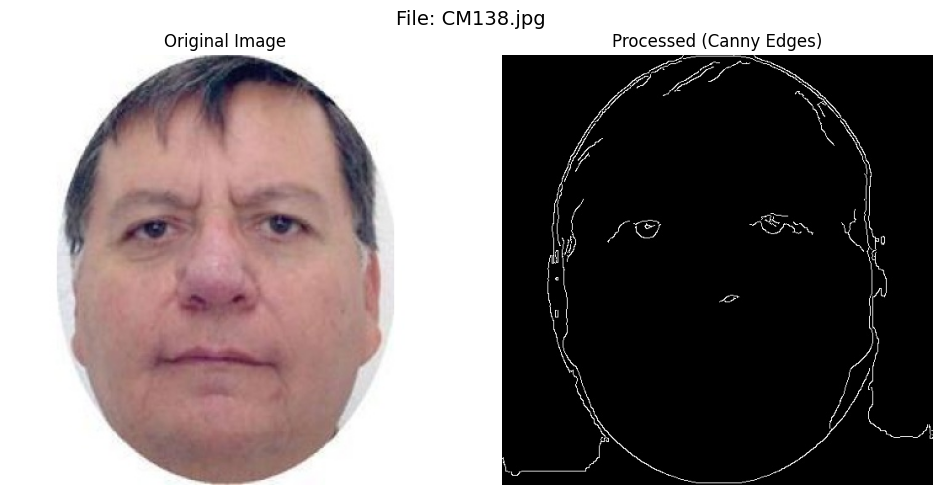

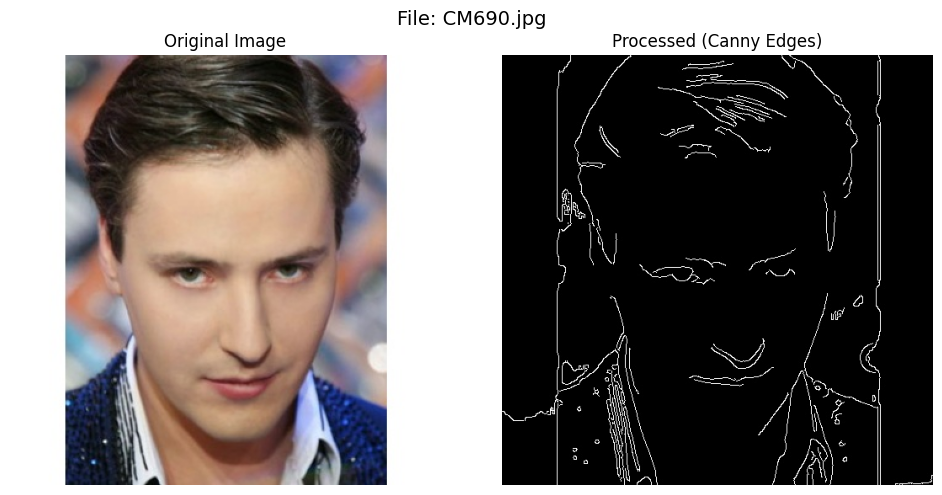

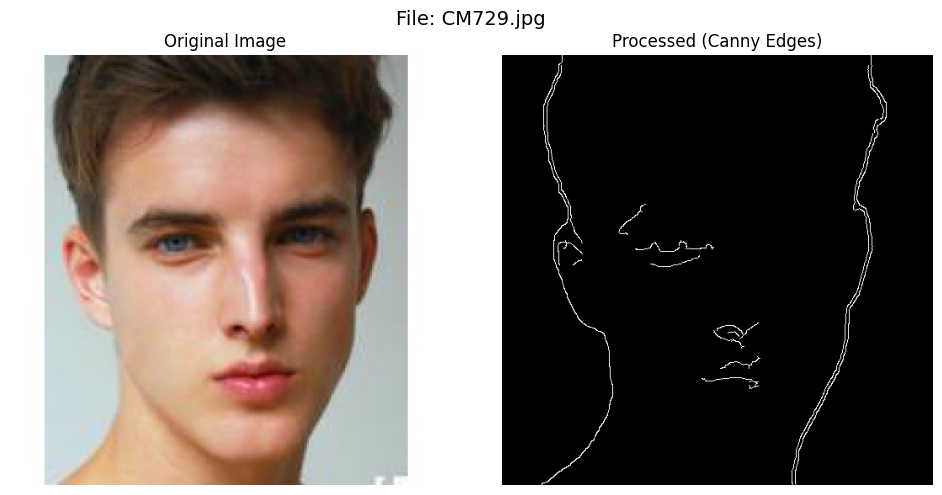

In [7]:
# --- 1. Get the list of images to process ---
image_paths_to_process = get_filtered_image_paths()
processing_results = []

# --- 2. Run the main processing loop ---
if image_paths_to_process:
    for path in tqdm(image_paths_to_process, desc="Processing Images"):
        result = process_image_pipeline(path)
        if result and result["landmarks"] is not None:
            # Save the processed edge image
            filename = os.path.basename(path)
            output_path = os.path.join(PROCESSED_IMAGES_DIR, filename)
            cv2.imwrite(output_path, result["processed_image_edges"])

            # Store metadata
            processing_results.append({
                "original_path": path,
                "processed_path": output_path,
                "landmarks": result["landmarks"]
            })

    # --- 3. Create a DataFrame with the results ---
    results_df = pd.DataFrame(processing_results)
    print(f"\n✅ Processing complete. Successfully processed {len(results_df)} images.")

    # Save the dataframe for future use
    results_df.to_csv(os.path.join(OUTPUT_DIR, 'processing_metadata.csv'), index=False)
    print(f"Metadata saved to {os.path.join(OUTPUT_DIR, 'processing_metadata.csv')}")
    print("\nDataFrame Head:")
    display(results_df.head())

    # --- 4. Visual Verification ---
    print("\n--- Visual Verification ---")
    samples_to_show = min(3, len(results_df))
    verification_samples = results_df.sample(samples_to_show)

    for index, row in verification_samples.iterrows():
        original_img = cv2.cvtColor(cv2.imread(row['original_path']), cv2.COLOR_BGR2RGB)
        processed_img = cv2.imread(row['processed_path'], cv2.IMREAD_GRAYSCALE)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"File: {os.path.basename(row['original_path'])}", fontsize=14)

        axes[0].imshow(original_img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(processed_img, cmap='gray')
        axes[1].set_title("Processed (Canny Edges)")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()
else:
    print("\nNo images found matching the criteria. Please check your file paths and filtering logic.")


--- Visual Verification: Samples from Each Dataset ---


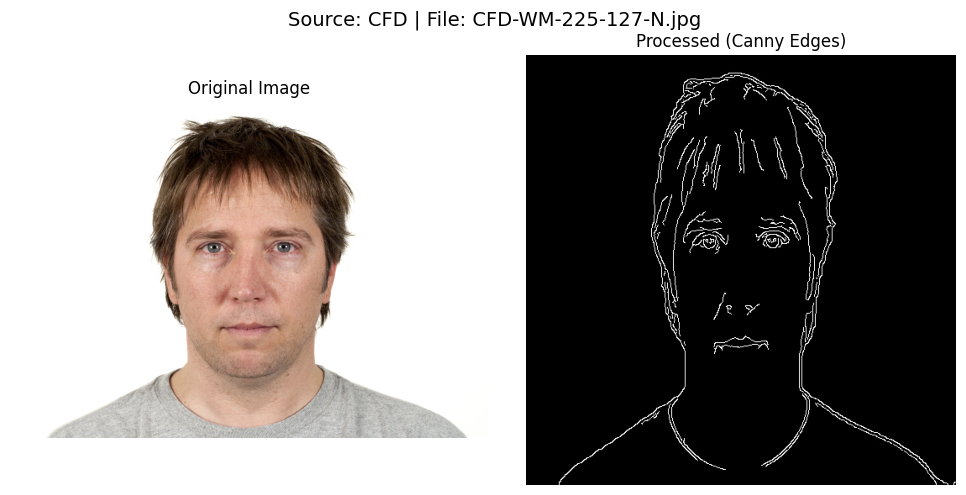

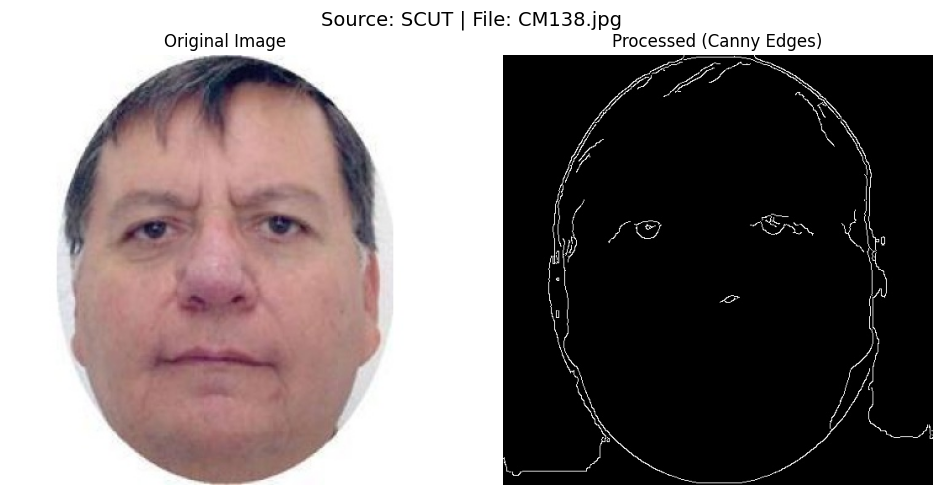

In [9]:
import cv2
import matplotlib.pyplot as plt

# --- 1. Add 'source' column for easier filtering ---
# We can determine the source from the original file path
def get_source(path):
    if 'SCUT-FBP5500' in path:
        return 'SCUT'
    elif 'CFD' in path:
        return 'CFD'
    return 'Unknown'

df['source'] = df['original_path'].apply(get_source)


# --- 2. Sample one image from each dataset ---
cfd_sample = df[df['source'] == 'CFD'].sample(1)
scut_sample = df[df['source'] == 'SCUT'].sample(1)

samples_to_show = pd.concat([cfd_sample, scut_sample])

# --- 3. Display the verification plots ---
print("\n--- Visual Verification: Samples from Each Dataset ---")

for index, row in samples_to_show.iterrows():
    original_img = cv2.cvtColor(cv2.imread(row['original_path']), cv2.COLOR_BGR2RGB)
    processed_img = cv2.imread(row['processed_path'], cv2.IMREAD_GRAYSCALE)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    title = f"Source: {row['source']} | File: {os.path.basename(row['original_path'])}"
    fig.suptitle(title, fontsize=14)

    axes[0].imshow(original_img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(processed_img, cmap='gray')
    axes[1].set_title("Processed (Canny Edges)")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

Configuring project paths...
Output directory for new results: /content/drive/MyDrive/FacialAttractivenessProject/processed_data/processed_images_v2
MediaPipe models initialized.
Filtering image paths from datasets...
Found 93 relevant images in CFD.
Found 750 relevant images in SCUT-FBP5500.
Total images to process: 843


Advanced Processing:   0%|          | 0/843 [00:00<?, ?it/s]


✅ Advanced processing complete. Successfully processed 843 images.
New metadata saved to /content/drive/MyDrive/FacialAttractivenessProject/processed_data/advanced_processing_metadata.csv

--- Visual Verification of Advanced Pipeline ---


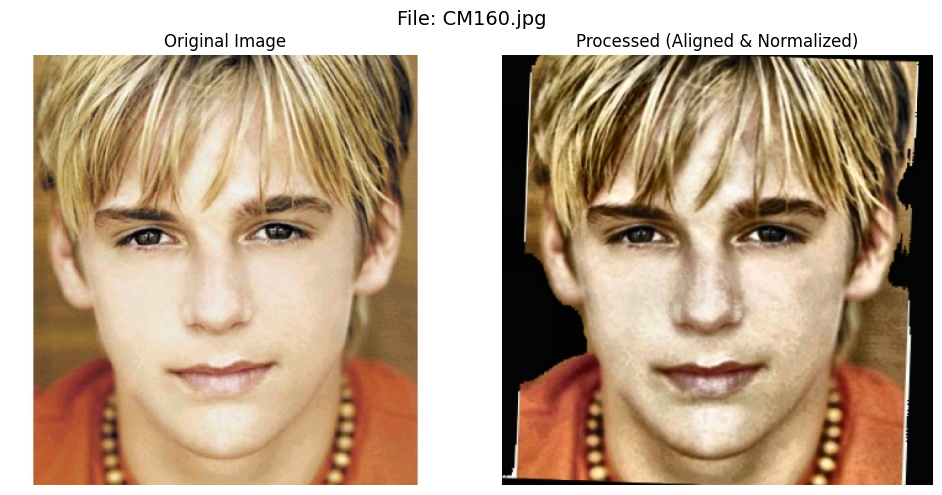

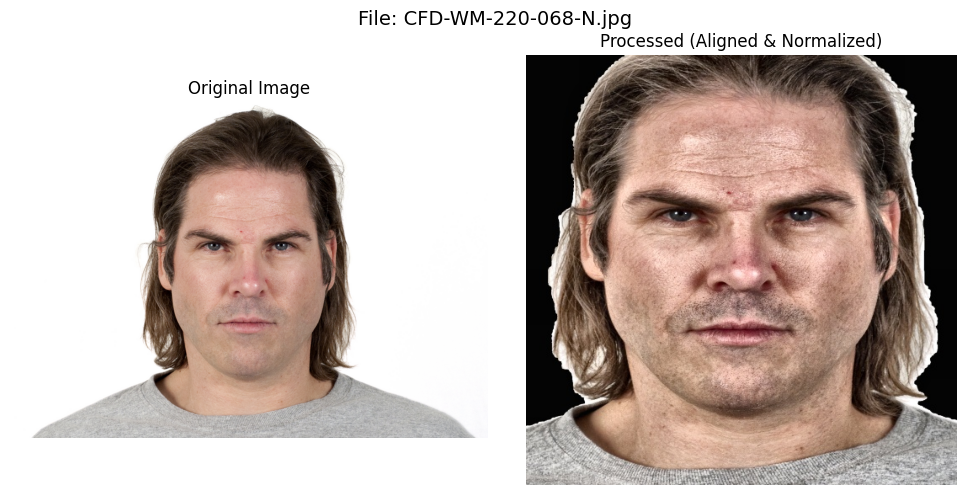

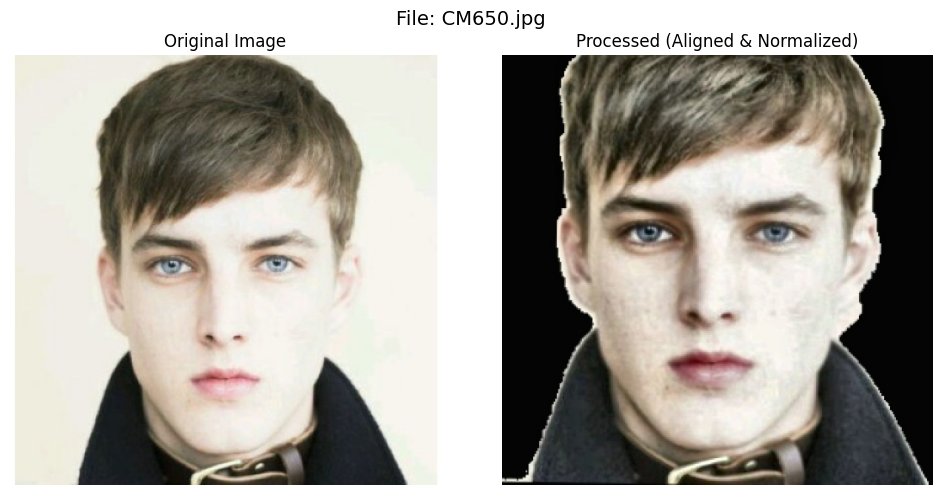

In [10]:
import os
import glob
import cv2
import numpy as np
import mediapipe as mp
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Setup and Initialization (Unchanged) ---
print("Configuring project paths...")
BASE_DIR = '/content/drive/MyDrive/FacialAttractivenessProject/datasets'
OUTPUT_DIR = '/content/drive/MyDrive/FacialAttractivenessProject/processed_data'
PROCESSED_IMAGES_DIR = os.path.join(OUTPUT_DIR, 'processed_images_v2') # New folder for new results

# Input paths for datasets
CFD_IMAGES_DIR = os.path.join(BASE_DIR, 'CFD/cfd/CFD Version 3.0/Images/CFD')
SCUT_IMAGES_DIR = os.path.join(BASE_DIR, 'SCUT-FBP5500_v2/Images')

os.makedirs(PROCESSED_IMAGES_DIR, exist_ok=True)
print(f"Output directory for new results: {PROCESSED_IMAGES_DIR}")

mp_face_mesh = mp.solutions.face_mesh
mp_selfie_segmentation = mp.solutions.selfie_segmentation

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5)
segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=0)
print("MediaPipe models initialized.")

# --- 2. Image Filtering (Unchanged) ---
def get_filtered_image_paths():
    print("Filtering image paths from datasets...")
    cfd_pattern = os.path.join(CFD_IMAGES_DIR, 'WM-*', '*-N.jpg')
    cfd_paths = glob.glob(cfd_pattern)
    print(f"Found {len(cfd_paths)} relevant images in CFD.")

    scut_pattern = os.path.join(SCUT_IMAGES_DIR, 'CM*.jpg')
    scut_paths = glob.glob(scut_pattern)
    print(f"Found {len(scut_paths)} relevant images in SCUT-FBP5500.")

    all_paths = cfd_paths + scut_paths
    print(f"Total images to process: {len(all_paths)}")
    return all_paths

# --- 3. The NEW Advanced Preprocessing Pipeline ---
def advanced_processing_pipeline(image_path, output_size=(512, 512)):
    """
    Applies a professional-grade preprocessing pipeline focused on standardization
    and data preservation for attractiveness analysis.
    """
    try:
        image_bgr = cv2.imread(image_path)
        if image_bgr is None: return None
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        # Step 1: Background Removal (Kept, as it isolates the subject)
        seg_results = segmentation.process(image_rgb)
        condition = np.stack((seg_results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_removed_rgb = np.where(condition, image_rgb, 0)

        # Step 2: Initial Landmark Detection for Alignment
        h, w, _ = image_rgb.shape
        mesh_results_initial = face_mesh.process(bg_removed_rgb)
        if not mesh_results_initial.multi_face_landmarks: return None

        landmarks = np.array([(lm.x * w, lm.y * h) for lm in mesh_results_initial.multi_face_landmarks[0].landmark])

        # Step 3: Landmark-Based Pose Alignment (Corrects Head Tilt)
        left_eye = landmarks[[33, 133]].mean(axis=0)  # Center of left eye landmarks
        right_eye = landmarks[[362, 263]].mean(axis=0) # Center of right eye landmarks

        dY = right_eye[1] - left_eye[1]
        dX = right_eye[0] - left_eye[0]
        angle = np.degrees(np.arctan2(dY, dX))

        eyes_center = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)

        rot_mat = cv2.getRotationMatrix2D(eyes_center, angle, 1.0)
        aligned_image = cv2.warpAffine(bg_removed_rgb, rot_mat, (w, h))

        # Step 4: Intelligent Cropping based on Aligned Landmarks
        mesh_results_aligned = face_mesh.process(aligned_image)
        if not mesh_results_aligned.multi_face_landmarks: return None

        aligned_landmarks = np.array([(lm.x * w, lm.y * h) for lm in mesh_results_aligned.multi_face_landmarks[0].landmark])
        x_min, y_min = aligned_landmarks.min(axis=0)
        x_max, y_max = aligned_landmarks.max(axis=0)

        # Add padding for a nicely framed result
        padding_x = (x_max - x_min) * 0.30
        padding_y = (y_max - y_min) * 0.30
        x1, y1 = int(x_min - padding_x), int(y_min - padding_y)
        x2, y2 = int(x_max + padding_x), int(y_max + padding_y)
        x1, y1 = max(0, x1), max(0, y1)
        x2, y2 = min(w, x2), min(h, y2)

        cropped_face = aligned_image[y1:y2, x1:x2]
        if cropped_face.size == 0: return None

        # Step 5: Final Resize & Color Normalization
        final_image = cv2.resize(cropped_face, output_size, interpolation=cv2.INTER_AREA)

        # Use CLAHE for lighting normalization on the L-channel of LAB color space
        lab = cv2.cvtColor(final_image, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        l_clahe = clahe.apply(l)
        lab_clahe = cv2.merge((l_clahe, a, b))
        normalized_image = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

        # Step 6: Final Landmark Extraction on the fully processed image
        final_mesh_results = face_mesh.process(normalized_image)
        if not final_mesh_results.multi_face_landmarks: return None

        final_landmarks = np.array([[lm.x, lm.y, lm.z] for lm in final_mesh_results.multi_face_landmarks[0].landmark]).flatten()

        return {
            "processed_image": normalized_image,
            "landmarks": final_landmarks
        }

    except Exception as e:
        print(f"Error processing {os.path.basename(image_path)}: {e}")
        return None

# --- 4. NEW Execution and Verification Loop ---
image_paths_to_process = get_filtered_image_paths()
processing_results = []

if image_paths_to_process:
    for path in tqdm(image_paths_to_process, desc="Advanced Processing"):
        result = advanced_processing_pipeline(path)
        if result and result["landmarks"] is not None:
            # Save the new, high-quality processed image
            filename = os.path.basename(path)
            output_path = os.path.join(PROCESSED_IMAGES_DIR, filename)
            # Convert back to BGR for saving with cv2
            cv2.imwrite(output_path, cv2.cvtColor(result["processed_image"], cv2.COLOR_RGB2BGR))

            processing_results.append({
                "original_path": path,
                "processed_path": output_path,
                "landmarks": result["landmarks"]
            })

    results_df = pd.DataFrame(processing_results)
    print(f"\n✅ Advanced processing complete. Successfully processed {len(results_df)} images.")

    results_df.to_csv(os.path.join(OUTPUT_DIR, 'advanced_processing_metadata.csv'), index=False)
    print(f"New metadata saved to {os.path.join(OUTPUT_DIR, 'advanced_processing_metadata.csv')}")

    # Visual Verification
    print("\n--- Visual Verification of Advanced Pipeline ---")
    samples_to_show = min(3, len(results_df))
    verification_samples = results_df.sample(samples_to_show)

    for index, row in verification_samples.iterrows():
        original_img = cv2.cvtColor(cv2.imread(row['original_path']), cv2.COLOR_BGR2RGB)
        processed_img = cv2.cvtColor(cv2.imread(row['processed_path']), cv2.COLOR_BGR2RGB)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"File: {os.path.basename(row['original_path'])}", fontsize=14)

        axes[0].imshow(original_img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(processed_img)
        axes[1].set_title("Processed (Aligned & Normalized)")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()
else:
    print("\nNo images found matching the criteria.")

Configuring project paths...
MediaPipe models re-initialized.
Filtering image paths from datasets...
Found 843 total images to process.


Regenerating Metadata:   0%|          | 0/843 [00:00<?, ?it/s]


✅ New, correct metadata saved to: /content/drive/MyDrive/FacialAttractivenessProject/processed_data/advanced_processing_metadata_CORRECT.csv
Successfully loaded new metadata for 843 images.

Displaying landmarks for 3 random samples...


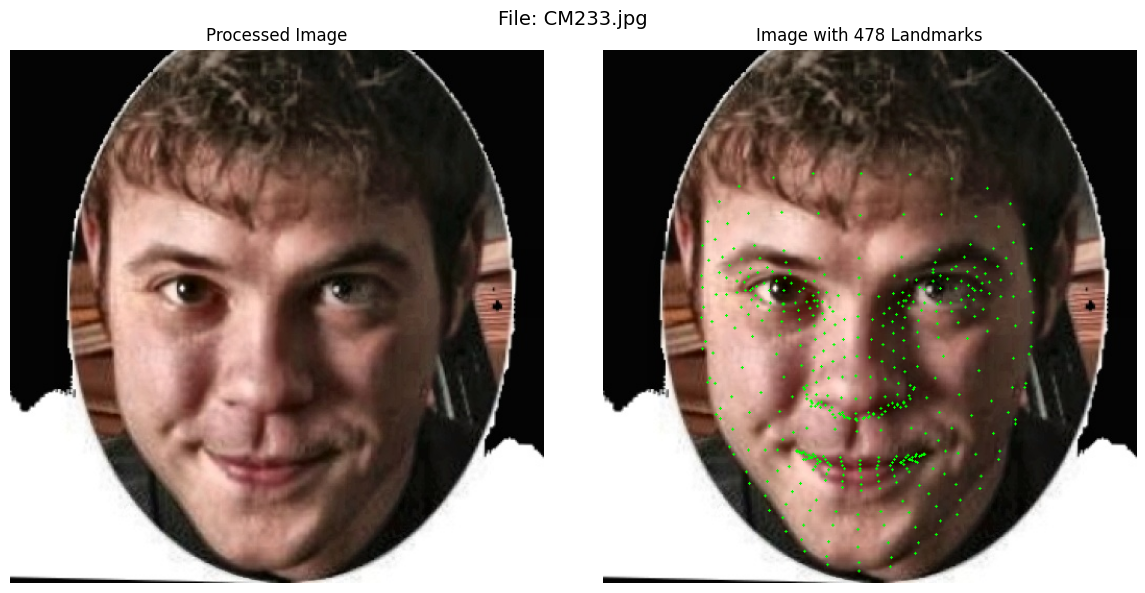

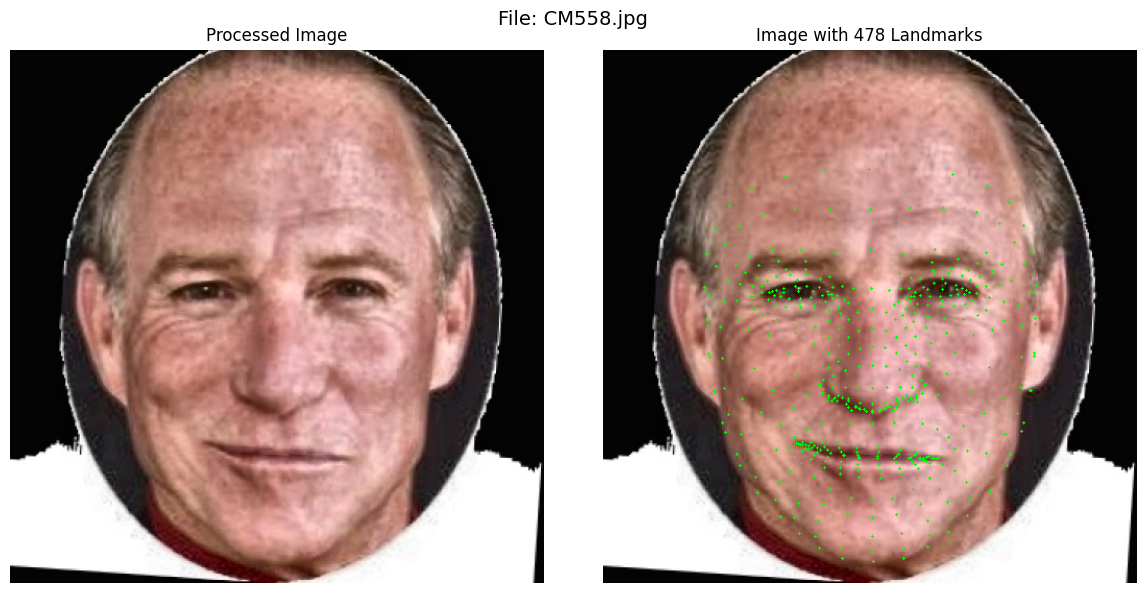

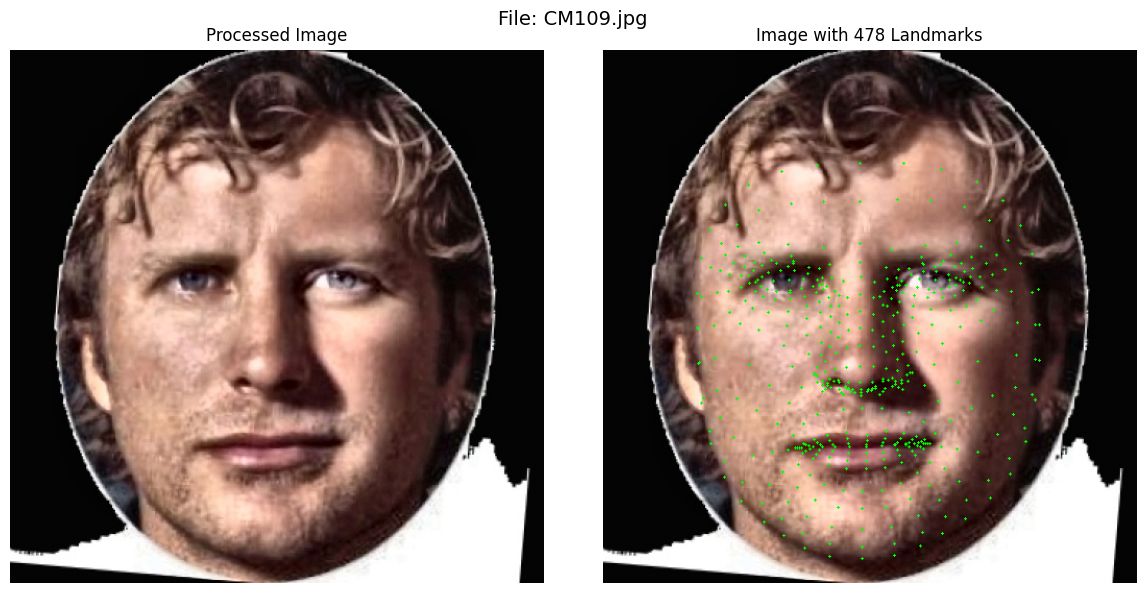

In [13]:
import os
import glob
import cv2
import numpy as np
import mediapipe as mp
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Setup and Initialization (Same as before) ---
print("Configuring project paths...")
BASE_DIR = '/content/drive/MyDrive/FacialAttractivenessProject/datasets'
OUTPUT_DIR = '/content/drive/MyDrive/FacialAttractivenessProject/processed_data'
# We'll use the same processed images, no need to re-create them
PROCESSED_IMAGES_DIR = os.path.join(OUTPUT_DIR, 'processed_images_v2')

CFD_IMAGES_DIR = os.path.join(BASE_DIR, 'CFD/cfd/CFD Version 3.0/Images/CFD')
SCUT_IMAGES_DIR = os.path.join(BASE_DIR, 'SCUT-FBP5500_v2/Images')

os.makedirs(PROCESSED_IMAGES_DIR, exist_ok=True)

mp_face_mesh = mp.solutions.face_mesh
mp_selfie_segmentation = mp.solutions.selfie_segmentation
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5)
segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=0)
print("MediaPipe models re-initialized.")

# --- 2. Image Filtering and Pipeline (Same as before) ---
def get_filtered_image_paths():
    print("Filtering image paths from datasets...")
    cfd_pattern = os.path.join(CFD_IMAGES_DIR, 'WM-*', '*-N.jpg')
    cfd_paths = glob.glob(cfd_pattern)
    scut_pattern = os.path.join(SCUT_IMAGES_DIR, 'CM*.jpg')
    scut_paths = glob.glob(scut_pattern)
    all_paths = cfd_paths + scut_paths
    print(f"Found {len(all_paths)} total images to process.")
    return all_paths

def advanced_processing_pipeline(image_path, output_size=(512, 512)):
    try:
        image_bgr = cv2.imread(image_path)
        if image_bgr is None: return None
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        seg_results = segmentation.process(image_rgb)
        condition = np.stack((seg_results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_removed_rgb = np.where(condition, image_rgb, 0)
        h, w, _ = image_rgb.shape
        mesh_results_initial = face_mesh.process(bg_removed_rgb)
        if not mesh_results_initial.multi_face_landmarks: return None
        landmarks = np.array([(lm.x * w, lm.y * h) for lm in mesh_results_initial.multi_face_landmarks[0].landmark])
        left_eye = landmarks[[33, 133]].mean(axis=0)
        right_eye = landmarks[[362, 263]].mean(axis=0)
        dY, dX = right_eye[1] - left_eye[1], right_eye[0] - left_eye[0]
        angle = np.degrees(np.arctan2(dY, dX))
        eyes_center = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)
        rot_mat = cv2.getRotationMatrix2D(eyes_center, angle, 1.0)
        aligned_image = cv2.warpAffine(bg_removed_rgb, rot_mat, (w, h))
        mesh_results_aligned = face_mesh.process(aligned_image)
        if not mesh_results_aligned.multi_face_landmarks: return None
        aligned_landmarks = np.array([(lm.x * w, lm.y * h) for lm in mesh_results_aligned.multi_face_landmarks[0].landmark])
        x_min, y_min = aligned_landmarks.min(axis=0)
        x_max, y_max = aligned_landmarks.max(axis=0)
        padding_x, padding_y = (x_max - x_min) * 0.30, (y_max - y_min) * 0.30
        x1, y1 = max(0, int(x_min - padding_x)), max(0, int(y_min - padding_y))
        x2, y2 = min(w, int(x_max + padding_x)), min(h, int(y_max + padding_y))
        cropped_face = aligned_image[y1:y2, x1:x2]
        if cropped_face.size == 0: return None
        final_image = cv2.resize(cropped_face, output_size, interpolation=cv2.INTER_AREA)
        lab = cv2.cvtColor(final_image, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        l_clahe = clahe.apply(l)
        lab_clahe = cv2.merge((l_clahe, a, b))
        normalized_image = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)
        final_mesh_results = face_mesh.process(normalized_image)
        if not final_mesh_results.multi_face_landmarks: return None
        final_landmarks = np.array([[lm.x, lm.y, lm.z] for lm in final_mesh_results.multi_face_landmarks[0].landmark]).flatten()
        return {"processed_image": normalized_image, "landmarks": final_landmarks}
    except Exception:
        return None

# --- 3. CORRECTED Execution Loop ---
image_paths_to_process = get_filtered_image_paths()
processing_results = []
NEW_METADATA_PATH = os.path.join(OUTPUT_DIR, 'advanced_processing_metadata_CORRECT.csv')

if image_paths_to_process:
    for path in tqdm(image_paths_to_process, desc="Regenerating Metadata"):
        result = advanced_processing_pipeline(path)
        if result and result["landmarks"] is not None:
            filename = os.path.basename(path)
            output_path = os.path.join(PROCESSED_IMAGES_DIR, filename)
            cv2.imwrite(output_path, cv2.cvtColor(result["processed_image"], cv2.COLOR_RGB2BGR))

            # --- THE FIX: Convert array to a clean string BEFORE saving ---
            landmark_string = ' '.join(map(str, result["landmarks"]))

            processing_results.append({
                "original_path": path,
                "processed_path": output_path,
                "landmarks": landmark_string # Store the clean string
            })

    results_df = pd.DataFrame(processing_results)
    results_df.to_csv(NEW_METADATA_PATH, index=False)
    print(f"\n✅ New, correct metadata saved to: {NEW_METADATA_PATH}")

# --- 4. Visualization Code (will now work correctly) ---
df_correct = pd.read_csv(NEW_METADATA_PATH)
print(f"Successfully loaded new metadata for {len(df_correct)} images.")

SAMPLES_TO_SHOW = 3
samples = df_correct.sample(SAMPLES_TO_SHOW)
print(f"\nDisplaying landmarks for {SAMPLES_TO_SHOW} random samples...")

for index, row in samples.iterrows():
    processed_image_rgb = cv2.cvtColor(cv2.imread(row['processed_path']), cv2.COLOR_BGR2RGB)
    image_with_landmarks = processed_image_rgb.copy()
    h, w, _ = image_with_landmarks.shape

    # This parsing method now works because the string is clean
    landmarks_array_flat = np.array(row['landmarks'].split(), dtype=float)
    landmarks = landmarks_array_flat.reshape(-1, 3)

    for i in range(landmarks.shape[0]):
        x, y = int(landmarks[i, 0] * w), int(landmarks[i, 1] * h)
        cv2.circle(image_with_landmarks, (x, y), radius=1, color=(0, 255, 0), thickness=-1)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"File: {os.path.basename(row['original_path'])}", fontsize=14)
    axes[0].imshow(processed_image_rgb)
    axes[0].set_title("Processed Image")
    axes[0].axis('off')
    axes[1].imshow(image_with_landmarks)
    axes[1].set_title("Image with 478 Landmarks")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

Successfully loaded new metadata for 843 images.

Selecting one random sample from CFD and one from SCUT for verification...


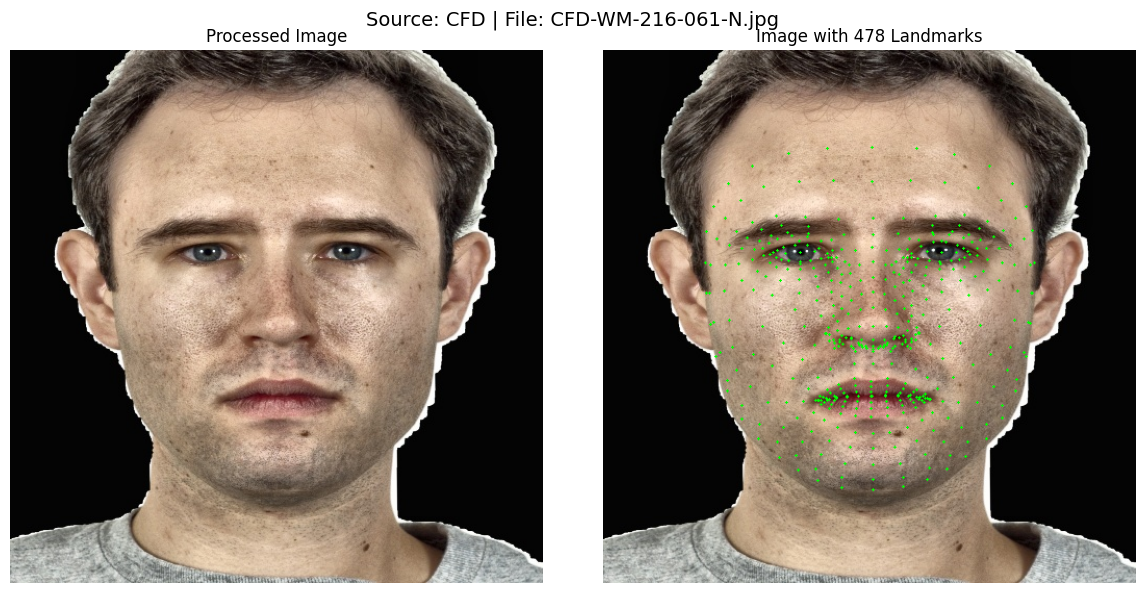

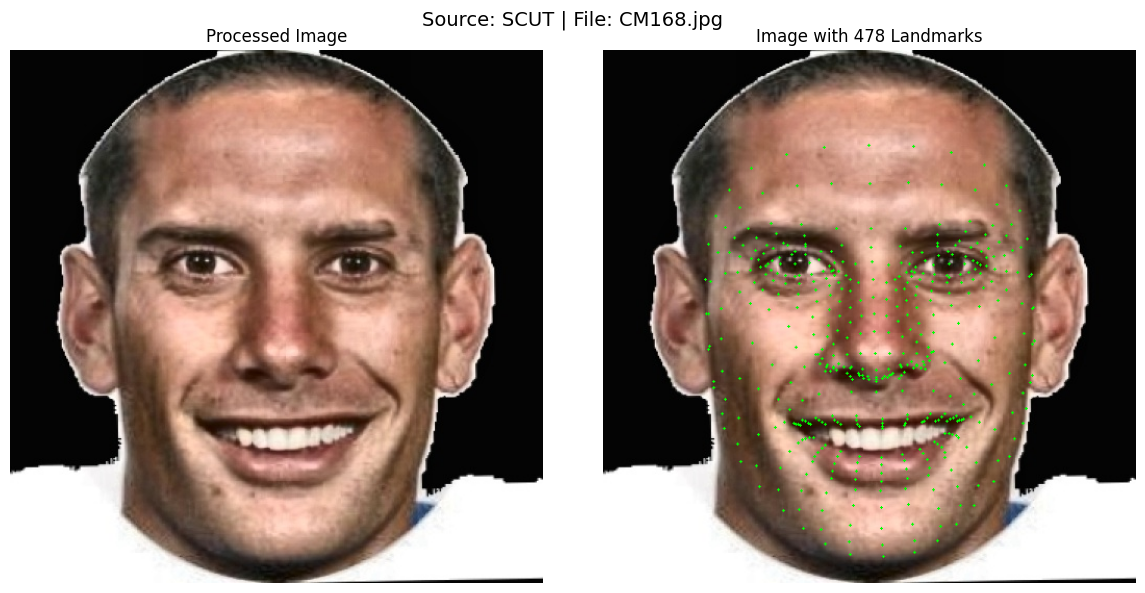

In [14]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# --- 1. Load the Corrected Metadata ---
NEW_METADATA_PATH = '/content/drive/MyDrive/FacialAttractivenessProject/processed_data/advanced_processing_metadata_CORRECT.csv'
df_correct = pd.read_csv(NEW_METADATA_PATH)
print(f"Successfully loaded new metadata for {len(df_correct)} images.")

# --- 2. Add a 'source' column for easy filtering ---
def get_source(path):
    if 'SCUT-FBP5500' in path:
        return 'SCUT'
    elif 'CFD' in path:
        return 'CFD'
    return 'Unknown'

df_correct['source'] = df_correct['original_path'].apply(get_source)

# --- 3. Explicitly Sample One from Each Dataset ---
print("\nSelecting one random sample from CFD and one from SCUT for verification...")

# Create separate dataframes for each source
cfd_df = df_correct[df_correct['source'] == 'CFD']
scut_df = df_correct[df_correct['source'] == 'SCUT']

# Sample one from each, checking if they are not empty
samples_to_show = pd.DataFrame()
if not cfd_df.empty:
    samples_to_show = pd.concat([samples_to_show, cfd_df.sample(1)])
if not scut_df.empty:
    samples_to_show = pd.concat([samples_to_show, scut_df.sample(1)])

# --- 4. Display the Verification Plots ---
for index, row in samples_to_show.iterrows():
    processed_image_rgb = cv2.cvtColor(cv2.imread(row['processed_path']), cv2.COLOR_BGR2RGB)
    image_with_landmarks = processed_image_rgb.copy()
    h, w, _ = image_with_landmarks.shape

    # Parse the landmark string
    landmarks_array_flat = np.array(row['landmarks'].split(), dtype=float)
    landmarks = landmarks_array_flat.reshape(-1, 3)

    # Draw each landmark on the face
    for i in range(landmarks.shape[0]):
        x, y = int(landmarks[i, 0] * w), int(landmarks[i, 1] * h)
        cv2.circle(image_with_landmarks, (x, y), radius=1, color=(0, 255, 0), thickness=-1)

    # Display the results
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Source: {row['source']} | File: {os.path.basename(row['original_path'])}", fontsize=14)
    axes[0].imshow(processed_image_rgb)
    axes[0].set_title("Processed Image")
    axes[0].axis('off')
    axes[1].imshow(image_with_landmarks)
    axes[1].set_title("Image with 478 Landmarks")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()